In [4]:
from sklearn.datasets import load_digits

In [45]:
mnist = load_digits()
images = mnist.images
images.shape


(1797, 8, 8)

In [19]:
data_mnist = mnist['data']

In [20]:
data_mnist.shape

(1797, 64)

In [16]:
targets_mnist = mnist.target

In [17]:
targets_mnist

array([0, 1, 2, ..., 8, 9, 8])

In [25]:
image = data_mnist[3]

In [32]:
image = image.reshape(8,8)

In [33]:
import matplotlib.pyplot as plt

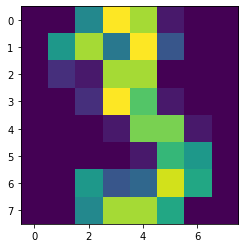

In [34]:
plt.imshow(image)

In [47]:
X_train , X_test , Y_train , Y_test = data_mnist[:1200],data_mnist[1200:],targets_mnist[:1200],targets_mnist[1200:]

In [48]:
import numpy as np
shufle_index = np.random.permutation(1200)
X_train , Y_train = X_train[shufle_index] , Y_train[shufle_index]

In [49]:
Y_train_5 = (Y_train == 5)
Y_test_5 = (Y_test == 5)

In [68]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train , Y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
y_train  = Y_train.reshape(-1,1)
sgd_clf.predict(X_test)

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,

In [89]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train , Y_train_5 , cv=3 ,scoring="accuracy")

array([0.99  , 0.9925, 0.985 ])

In [90]:
from sklearn.model_selection import cross_val_predict

In [91]:
prediction  = cross_val_predict(sgd_clf , X_train , Y_train_5 , cv=3)

In [92]:
prediction

array([False, False, False, ..., False, False, False])

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
confusion_matrix(Y_train_5,prediction)

array([[1072,    5],
       [   8,  115]], dtype=int64)

In [97]:
from sklearn.metrics import precision_score , recall_score 

In [99]:
precision_score(Y_train_5, prediction)

0.9583333333333334

In [100]:
recall_score(Y_train_5 , prediction)

0.9349593495934959

In [101]:
from sklearn.metrics import f1_score 

In [102]:
f1_score(Y_train_5 , prediction)

0.9465020576131687